In [90]:
import numpy as np
import sympy as sp

from functools import reduce
from typing import Callable, Iterable

import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from variables import plot_graphic


# Onbayev Baurzhan (15 variant)

In [91]:
def f(x: float) -> float:
    return 2 * np.log(x + 5 ** (1 / 2)) * np.sinh(x)


def f_d(x: float) -> float:
    return 2 * np.sinh(x) / (x + np.sqrt(5)) + 2 * np.log(x + np.sqrt(5)) * np.cosh(x)


def f_5_d(x: float) -> float:
    s = x + np.sqrt(5)
    return (
        10 * np.sinh(x) / s
        + 40 * np.sinh(x) / s**3
        + 48 * np.sinh(x) / s**5
        - 20 * np.cosh(x) / s**2
        - 60 * np.cosh(x) / s**4
        + 2 * np.log(s) * np.cosh(x)
    )


a = 1
b = 3

x_1 = 1.24
x_2 = 1.97
x_3 = 2.54

control_x_collection = [x_1, x_2, x_3]
x_collection = [a + k * (b - a) / 4 for k in range(0, 5)]
x_collection_ = [
    (b - a) / 2 * np.cos((2 * k - 1) * np.pi / 10) + (b + a) / 2 for k in range(1, 6)
][::-1]


# task 1

In [92]:
# polynom - будем хранить коэффициенты слева направо по убыванию степени икса


class task_1:
    def __init__(self, x_collection: Iterable, f: Callable) -> None:
        self.x_collection = x_collection
        self.func = f
        self.y_collection = [f(x) for x in x_collection]

    @staticmethod
    def pol_prod(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a * b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        size_c = size_a + size_b - 1
        c = [0.0] * size_c
        for i in range(size_a):
            for j in range(size_b):
                c[i + j] += a[i] * b[j]
        return c

    @staticmethod
    def pol_sum(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a + b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        max_len = max(size_a, size_b)
        min_len = min(size_a, size_b)
        size_c = max_len
        c = [0.0] * size_c

        if size_a == size_b:
            for i in range(size_c):
                c[i] = a[i] + b[i]
            return c

        arr = a if size_a < size_b else b
        c_ = [0.0] * (max_len - min_len) + [el for el in arr]
        for i in range(size_c):
            x = a[i] if size_a > size_b else b[i]
            c[i] = c_[i] + x
        return c

    @staticmethod
    def take_derivate(w):
        """
        params:
            w - polynom coefficients (от макс степени к мин степени)
        returns:
            w_ - w polynom-deriviate coefficients (от макс степени к мин степени)
        """
        w_ = np.zeros_like(w)
        size = len(w)
        for i in range(1, size):
            w_[i] = w[i - 1] * (size - i)
        return w_[1:]

    @staticmethod
    def f(w, x):
        """
        params:
            w: iterable object - коэффициенты полинома от максимальной степени к минимальной
            x: some number - x value
        returns:
            polynom-function value of x
        """
        size = len(w)
        return sum([w[i] * x ** (size - i - 1) for i in range(size)])

    def count_l_k_var_1(self, k: int):
        w = [1]
        s = 1
        for i in range(len(self.x_collection)):
            if i != k:
                w = task_1.pol_prod(w, [1, -self.x_collection[i]])
                s *= self.x_collection[k] - self.x_collection[i]

        for i, a in enumerate(w):
            w[i] = a / s

        return w

    def count_l_k_var_2(self, k: int):
        w = reduce(
            task_1.pol_prod,
            [[1, -x] for i, x in enumerate(self.x_collection) if i != k],
        )
        w_d = task_1.take_derivate(w)
        s = task_1.f(w_d, self.x_collection[k])
        for i, a in enumerate(w):
            w[i] = a / s
        return w

    def count_L(self):
        if any(
            [
                not hasattr(self, "fund_pol_collection_var_1"),
                not hasattr(self, "fund_pol_collection_var_2"),
            ]
        ):
            self.fund_pol_collection_var_1 = [
                self.count_l_k_var_1(k) for k in range(len(self.x_collection))
            ]
            self.fund_pol_collection_var_2 = [
                self.count_l_k_var_2(k) for k in range(len(self.x_collection))
            ]

    def L(self, x: float, var: int) -> float:
        s = 0
        for i in range(len(self.x_collection)):
            if 1 == var:
                s += self.y_collection[i] * task_1.f(
                    self.fund_pol_collection_var_1[i],
                    x,
                )
            elif 2 == var:
                s += self.y_collection[i] * task_1.f(
                    self.fund_pol_collection_var_2[i],
                    x,
                )
        return s


In [93]:
l = task_1(x_collection, f)
l.count_L()

print("в узловых точках")
for x in x_collection:
    print(f(x), l.L(x, 1))

print()
print("в контрольных точках")
for x in control_x_collection:
    print(f(x), l.L(x, 1))


в узловых точках
2.7602162103408827 2.7602162103408827
5.612924222916675 5.612924222916616
10.47172869657889 10.471728696578912
18.818643755906045 18.81864375590563
33.17060303042373 33.17060303042326

в контрольных точках
3.9448106021193134 3.9316387161730653
10.100545557435815 10.1016037882857
19.70283991653756 19.705341014952765


/tmp/ipykernel_73185/1892868674.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  w[i] = a / s


In [95]:
reduce(task_1.pol_sum, l.fund_pol_collection_var_1)


[1.1102230246251565e-16,
 8.881784197001252e-16,
 -1.7763568394002505e-15,
 -5.329070518200751e-15,
 1.0]

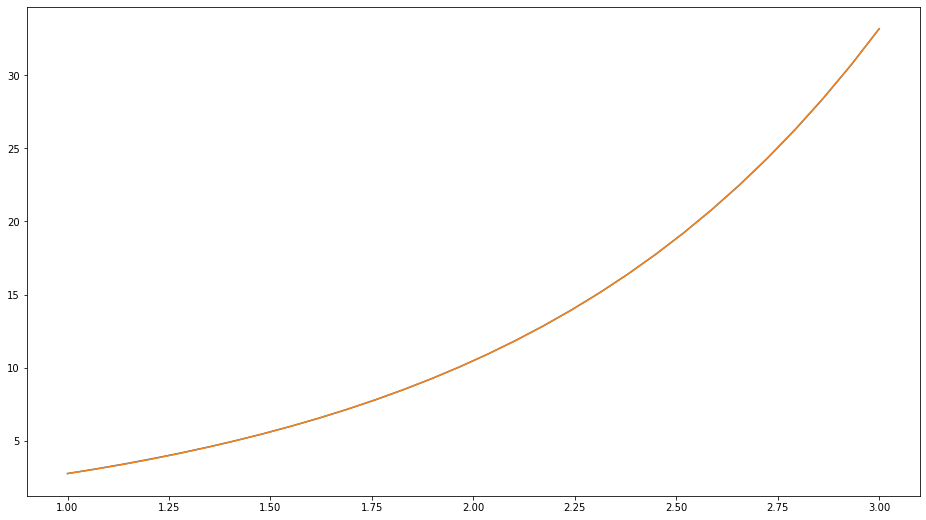

In [74]:
plot_graphic([f, lambda x: l.L(x, 1)], a, b, 30)


In [75]:
l = task_1(x_collection_, f)
l.count_L()

print("в узловых точках")
for x in x_collection_:
    print(f(x), l.L(x, 1))

print()
print("в контрольных точках")
for x in control_x_collection:
    print(f(x), l.L(x, 1))


в узловых точках
2.9785704461222102 2.978570446122216
4.997686066658387 4.997686066659021
10.47172869657889 10.471728696578793
20.810654146469563 20.81065414646896
31.399006643935966 31.399006643935145

в контрольных точках
3.9448106021193134 3.937588097565987
10.100545557435815 10.101869512451906
19.70283991653756 19.700036641490613


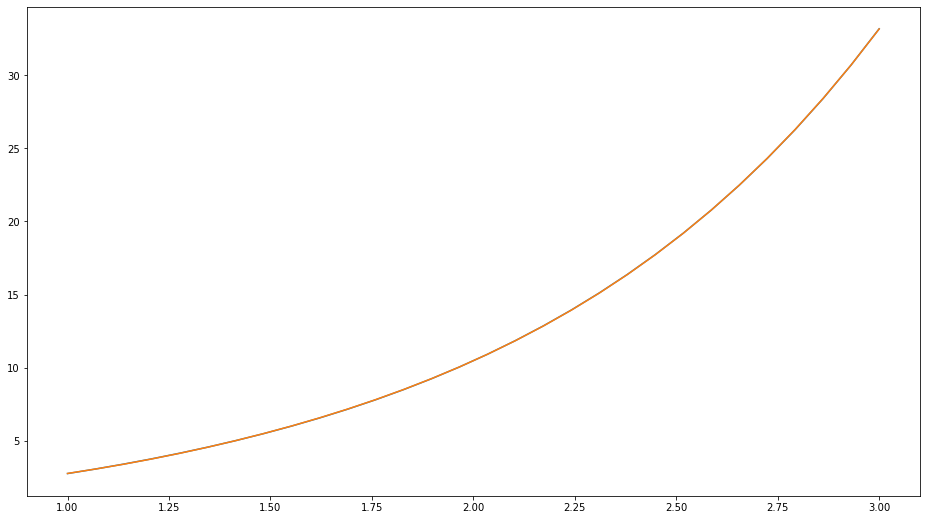

In [76]:
plot_graphic([f, lambda x: l.L(x, 1)], a, b, 30)


посчитаем погрешность

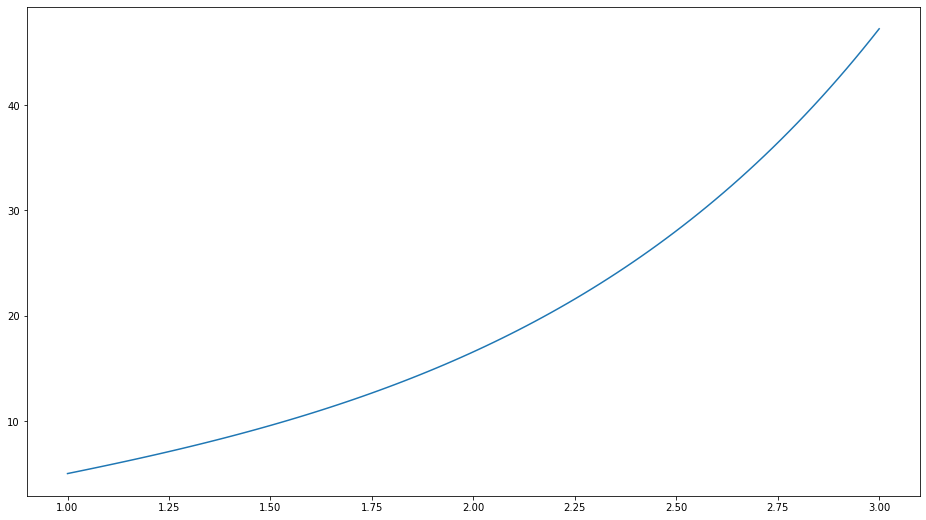

47.23356084605122


In [86]:
# она возрастающая, значит максимальное значение в правом конце отрезка
plot_graphic([f_5_d], a, b, 100)
print(f_5_d(b))


In [89]:
f_5_d(b) / math.factorial(5)


0.39361300705042684

In [77]:
# rn(x) = f_5_d(ksi)/5! * w_n(x)

# (5th derivative 2 * ln(x + sqrt(5)) * sinh(x))
# (5th derivative 2 * ln(x + sqrt(5)) * sinh(x)) / 5! *  (x-1) *(x-1.5)* (x-2)* (x-2.5) * (x-3)
# (derivative 0.4 *  (x-1) *(x-1.5)* (x-2)* (x-2.5) * (x-3)) = 0
# max 0.4 *  (x-1) *(x-1.5)* (x-2)* (x-2.5) * (x-3) from 1 to 3
x_collection, x_collection_


([1.0, 1.5, 2.0, 2.5, 3.0],
 [1.0489434837048464,
  1.412214747707527,
  2.0,
  2.5877852522924734,
  2.9510565162951536])

# task 2

In [97]:
class task_2(task_1):
    def __init__(self, x_collection: Iterable, f: Callable) -> None:
        super().__init__(x_collection, f)

    def diff_ratio(self, *args):
        """
        мы всегда платим либо памятью, либо скоростью
        я ставлю в приоритет память, поэтому каждый раз всё пересчитываю в рекурсии
        :)))
        """
        if len(args) == 2:
            return (self.y_collection[args[-1]] - self.y_collection[args[0]]) / (
                self.x_collection[args[-1]] - self.x_collection[args[0]]
            )
        return (self.diff_ratio(*args[1:]) - self.diff_ratio(*args[:-1])) / (
            self.x_collection[args[-1]] - self.x_collection[args[0]]
        )

    def count_L(self):
        w = [self.y_collection[0]]
        for i in range(len(self.x_collection) - 1):
            w_curr = reduce(
                task_2.pol_prod, [[1, -self.x_collection[j]] for j in range(i + 1)]
            )
            s = self.diff_ratio(*list(range(i + 2)))
            for i, a in enumerate(w_curr):
                w_curr[i] = a * s
            w = task_2.pol_sum(w, w_curr)
        self.w = w

    def L(self, x):
        return task_2.f(self.w, x)


In [98]:
l = task_2(x_collection, f)
l.count_L()

print("в узловых точках")
for x in x_collection:
    print(f(x), l.L(x))

print()
print("в контрольных точках")
for x in control_x_collection:
    print(f(x), l.L(x))


в узловых точках
2.7602162103408827 2.7602162103408836
5.612924222916675 5.6129242229166785
10.47172869657889 10.471728696578896
18.818643755906045 18.818643755906052
33.17060303042373 33.17060303042374

в контрольных точках
3.9448106021193134 3.9316387161728366
10.100545557435815 10.101603788285148
19.70283991653756 19.705341014951696


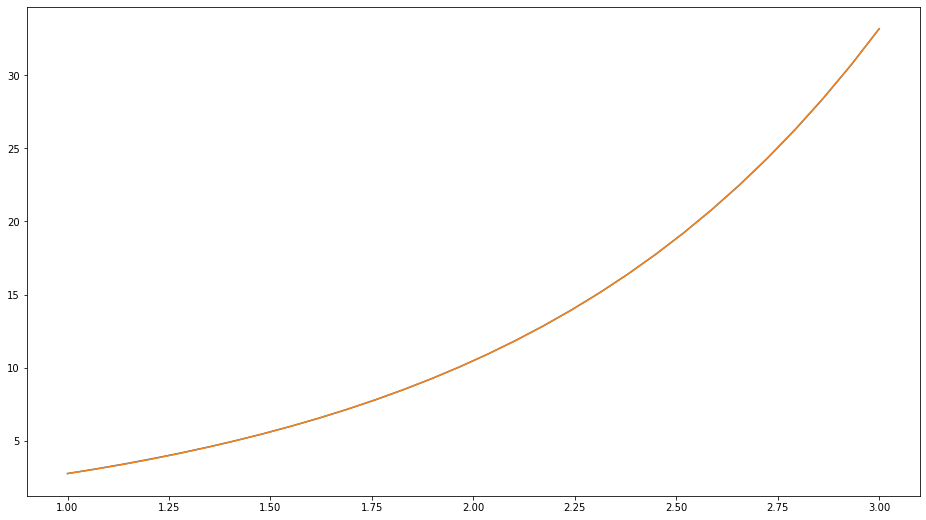

In [99]:
plot_graphic([f, l.L], a, b, 30)


# task 3